#K Means CLustering on digit dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#K Menas Clustering
from sklearn.cluster import KMeans

#Loading digit Dataset
from sklearn.datasets import load_digits

#Selecting k through silhoutte score
from sklearn.metrics import silhouette_score

#Normalization through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#Clustering of digits

We will use digit dataset for clustering, which is loaded through `load_digit` API.
- It loads `8x8` digit images with approximately 180 samples per class
- FRom 10 classes, it has total of 1797 images.
- Each pixel has value between 0 and 16

In [2]:
digits=load_digits()

In [3]:
?KMeans

Some of the important parameters are as follows:
- `init`
- `n_init`
- `max_iter`
- `random_state`

Since KMeans algorithm is susceptible to local minima, we perform multiple KMeans fit and select one with the lowest value of sum of squared error 

The total number of time, we would like to run KMeans algorithm is specified through `n_init` parameter.

`max_iter` specifies total number of iterations to perform before declaring the convergence

Let's define parameters of KMeans clustering algorithm in a dictionary object:

In [4]:
kmeans_kwargs={
        "init":"random",
        "n_init":50,
        "max_iter":500,
        "random_state":0,
}

In [5]:
pipeline=Pipeline([("Preprocess",MinMaxScaler()),
                   ("Clustering",KMeans(n_clusters=10,**kmeans_kwargs))])
pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

The cluster centroids can be accessed via `cluster_centers_` member variable of KMeans class

In [6]:
cluster_centers = pipeline[-1].cluster_centers_

Let's display cluster centroids:

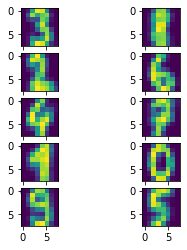

In [7]:
#displaying centroids
fig, ax = plt.subplots(5,2,figsize=(4,4))
for i,j in zip(ax.flat, cluster_centers.reshape(10,8,8)):
  i.imshow(j)

In this case, the number of clusters were known. Hence we set k=10 ad got the clusters

For deciding the optimal number of clusters through elbow and silhouette, we will pretend that we do not know the number of clusters in the data and we will try to discover the optimal number of clusters through these two methods one by one:

In [8]:
#Identifying thecorrect number of clusters
sse_digit=[]

scaled_digits=MinMaxScaler().fit_transform(digits.data)
for k in range(1,12):
  kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(scaled_digits)
  sse_digit.append(kmeans.inertia_)

Note that the SSE for a given clustering output is obtained through `inertia_` member variable.

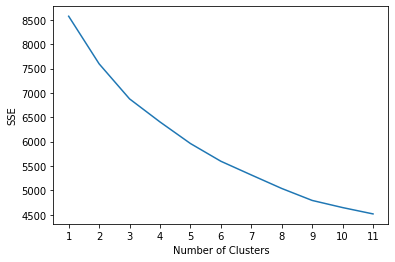

In [9]:
plt.plot(range(1,12),sse_digit)
plt.xticks(range(1,12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Slight elbow at k=9

In [10]:
sil_coef_digits=[]
for k in range(2,15):
  kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  score=silhouette_score(digits.data, kmeans.labels_)
  sil_coef_digits.append(score)

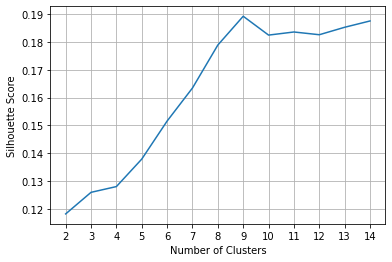

In [11]:
plt.plot(range(2,15),sil_coef_digits)
plt.xticks(range(2,15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [12]:
print(np.argmax(sil_coef_digits)+2)

9


This graph points the fact that n=9 this could be because some of the digits like 1 and 7 may have striking similarity

#Hierarchical Agglomerative Clustering(HAC) Algorithm

Two approaches:
- Bottom-up Approach: Eachdatum considered as cluster and then combine closest clusters tp form large clusters
- Top-Down Approach: Enite data is considered as a one single cluster which is divided to form smaller clusters in each step

Merging and splitting conditions

## Metric
Certain metrics are used for calculating similarity between clusters. Note that metric is a generalization of concept of distance. The metrics follow certain propertiels like:

(i) non-negative

(ii) symmetric

(iii) follows traingle inequality

Some of the popular metrics:

1. **Euclidean-**
2. **Manhattan**
3. **Cosine distance**
> $\large{d(x^{(i)},x^{(j)})=1-\frac{x^{(i)}.x^{(j)}}{||x^{(i)}||||x^{(j)}||}} = 1-cos\theta$


##Linkage
Linkage is a strategy for aggregating clusters.
There are four linkages we will study
- **Single linkage:** merges clusters based on the shortest distance over all possible pairs
- **Average linkage:** average distance over all possible between the groups for merging clusters 
- **Complete Linkage: ** merges clusters to minimize the maximum distance between the clusters(In other words, the distance of the furthest elements)
- **Ward's Linkage**: sum of squared distances within the clusters


## Hierarchical Agglomerative Clustering

Algorithm:
1. Caluclate the distance mstrix between the pairs of clusters
2. While all the objects are clustered into one
  
  2a. Detect the two closest groups(clusters) and merge them 

## Dendogram

Dendograms are a graphical representations of the agglomerative process which show a how aggregation happens at each level

## Using a toy dataset top demonstrate the working of HAC


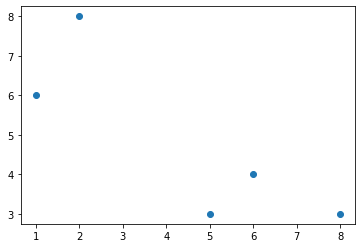

In [13]:
from sklearn.preprocessing import normalize

X=np.array([(8,3),(5,3),(6,4),(1,6),(2,8)])
scaled_X=normalize(X)
plt.scatter(X[:,0],X[:,1])
plt.show()

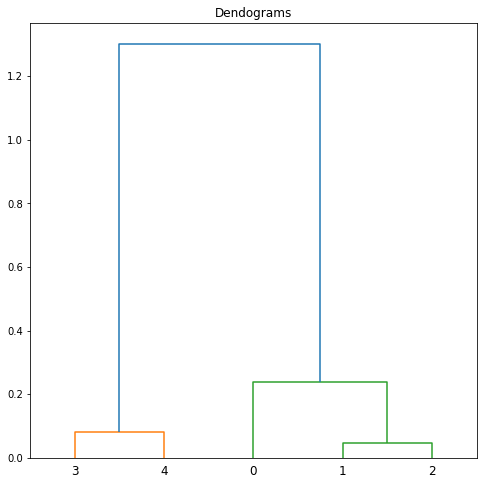

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8,8))
plt.title("Dendograms")
dend=shc.dendrogram(shc.linkage(scaled_X,method='ward'))

#Practice Assignment

In [15]:
from sklearn.datasets import load_iris

In [17]:
data=load_iris(as_frame=True)

In [21]:
data.data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [22]:
data.target.isnull().sum()

0

In [25]:
kmeans_kwargs={"init":"random","n_init":50,"max_iter":500,"random_state":10}

In [26]:
data.data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [27]:
clf=KMeans(n_clusters=5,**kmeans_kwargs)
clf.fit(data.data,data.target)

KMeans(init='random', max_iter=500, n_clusters=5, n_init=50, random_state=10)

In [28]:
clf.inertia_

46.446182051282065

In [29]:
sse=[]
for k in range(1,13):
  clf=KMeans(n_clusters=k,**kmeans_kwargs)
  clf.fit(data.data,data.target)
  sse.append(clf.inertia_)


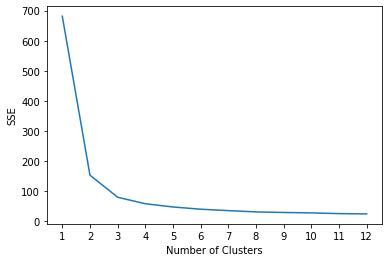

In [30]:
plt.plot(range(1,13),sse)
plt.xticks(range(1,13))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [31]:
clf=KMeans(n_clusters=3,**kmeans_kwargs)
clf.fit(data.data,data.target)
clf.inertia_

78.851441426146